# Example - Interpolate Missing Data

In [1]:
import rioxarray # for the extension to load
import xarray

%matplotlib inline

## Load in xarray dataset

In [2]:
xds = xarray.open_dataarray("MODIS_ARRAY.nc")

In [3]:
xds

<xarray.DataArray (y: 200, x: 200)>
array([[ nan,  nan,  nan, ..., 656., 656., 554.],
       [ nan,  nan,  nan, ..., 694., 694., 642.],
       [ nan,  nan,  nan, ..., 456., 575., 642.],
       ...,
       [993., 817., 817., ..., 471., 479., 498.],
       [893., 893., 816., ..., 479., 479., 469.],
       [816., 816., 832., ..., 515., 469., 485.]], dtype=float32)
Coordinates:
  * y        (y) float64 5.05e+06 5.05e+06 5.05e+06 ... 5.004e+06 5.004e+06
  * x        (x) float64 -7.274e+06 -7.274e+06 ... -7.228e+06 -7.228e+06
Attributes:
    crs:        +a=6371007.181 +b=6371007.181 +lon_0=0 +no_defs +proj=sinu +u...
    res:        [231.65635826 231.65635826]
    is_tiled:   0
    nodata:     -28672.0
    transform:  [ 2.31656358e+02  0.00000000e+00 -7.27400965e+06  0.00000000e...

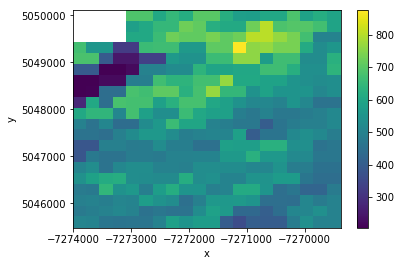

In [4]:
xds.isel(x=slice(0, 20), y=slice(0, 20)).plot()

## Fill misssing with interpolate_na

API Reference:

- DataArray: [rio.interpolate_na()](../rioxarray.rst#rioxarray.raster_array.RasterArray.interpolate_na)
- Dataset: [rio.interpolate_na()](../rioxarray.rst#rioxarray.raster_dataset.RasterDataset.interpolate_na)

In [5]:
filled = xds.rio.interpolate_na()

In [6]:
filled

<xarray.DataArray (y: 200, x: 200)>
array([[673., 558., 687., ..., 656., 656., 554.],
       [673., 558., 558., ..., 694., 694., 642.],
       [673., 558., 558., ..., 456., 575., 642.],
       ...,
       [993., 817., 817., ..., 471., 479., 498.],
       [893., 893., 816., ..., 479., 479., 469.],
       [816., 816., 832., ..., 515., 469., 485.]], dtype=float32)
Coordinates:
  * y            (y) float64 5.05e+06 5.05e+06 5.05e+06 ... 5.004e+06 5.004e+06
  * x            (x) float64 -7.274e+06 -7.274e+06 ... -7.228e+06 -7.228e+06
    spatial_ref  int64 0
Attributes:
    transform:     (231.6563582639561, 0.0, -7274009.649486291, 0.0, -231.656...
    _FillValue:    -28672.0
    grid_mapping:  spatial_ref

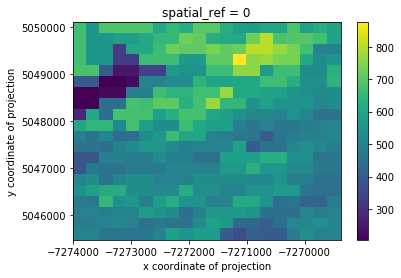

In [7]:
filled.isel(x=slice(0, 20), y=slice(0, 20)).plot()